
Notebook from [Predicting the ‘Future’ with Facebook’s Prophet](https://towardsdatascience.com/predicting-the-future-with-facebook-s-prophet-bdfe11af10ff)

## Installation

`conda install pystan`

`conda install -c conda-forge fbprophet`

## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('data/medium_stats.xlsx')
df.head()

,Date,Views
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


## Analysing the datatypes

In [66]:
df.dtypes

Date     datetime64[ns]
Views             int64
dtype: object

## Plotting to get insights

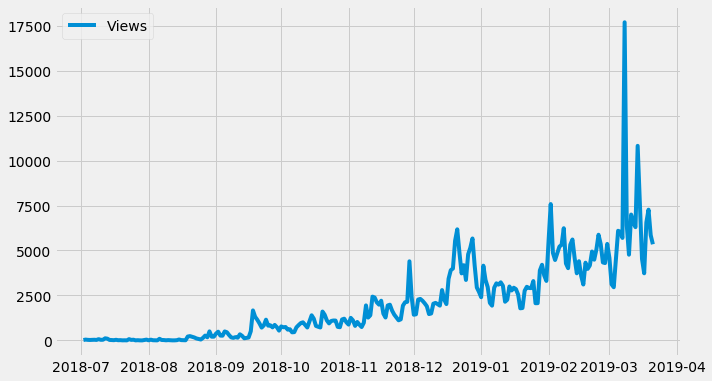

In [67]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])


In [68]:
## Removing the Outliers: Optional

In [69]:
"""df.loc[(df['Views'] > 10000), 'Views'] = np.nan
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])"""

"df.loc[(df['Views'] > 10000), 'Views'] = np.nan\nplt.figure(figsize=(10,6))\nplt.plot(df.set_index('Date'))\nplt.legend(['Views'])"

## Converting Views column to its log value

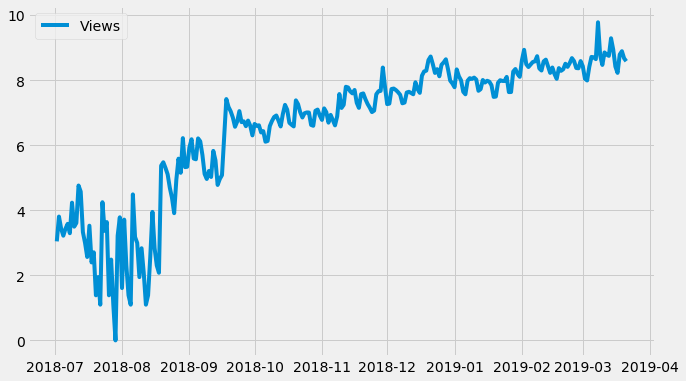

In [70]:
df['Views'] = np.log(df['Views'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])

## Making the dataset 'Prophet' compliant.

In [71]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-07-02,3.044522
1,2018-07-03,3.806662
2,2018-07-04,3.433987
3,2018-07-05,3.218876
4,2018-07-06,3.433987


## Making Predictions

Prophet follows the sklearn model API wherein an instance of the Prophet class is created and then the fit and predict methods are called. The model is instantiated by a new Prophet object and followed by calling its fit method and passing in the historical dataframe.

In [72]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly)if required.

In [76]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,318,319,320,321,322
ds,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00
trend,10.0442,10.056,10.0677,10.0795,10.0912
yhat_lower,8.60181,8.56941,8.29388,8.28266,8.73386
yhat_upper,10.5555,10.4698,10.232,10.1784,10.7017
trend_lower,9.78636,9.79157,9.79958,9.8055,9.80798
trend_upper,10.289,10.3074,10.3228,10.3407,10.3608
additive_terms,-0.457252,-0.494368,-0.811578,-0.870665,-0.333532
additive_terms_lower,-0.457252,-0.494368,-0.811578,-0.870665,-0.333532
additive_terms_upper,-0.457252,-0.494368,-0.811578,-0.870665,-0.333532
daily,-0.527617,-0.527617,-0.527617,-0.527617,-0.527617


In [77]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
318,2019-05-16,9.586953,8.601810,10.555524
319,2019-05-17,9.561590,8.569411,10.469817
320,2019-05-18,9.256134,8.293878,10.232014
321,2019-05-19,9.208801,8.282658,10.178427
322,2019-05-20,9.757688,8.733858,10.701723


Since we took the log of Views, let's convert back to original values 

In [78]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
318,14573.399958,5441.499750,38388.912755
319,14208.423059,5268.025913,35235.781949
320,10468.586937,3999.314893,27778.407237
321,9984.615758,3954.691524,26329.013727
322,17286.610536,6209.640500,44432.353364


## Plotting the Forecast

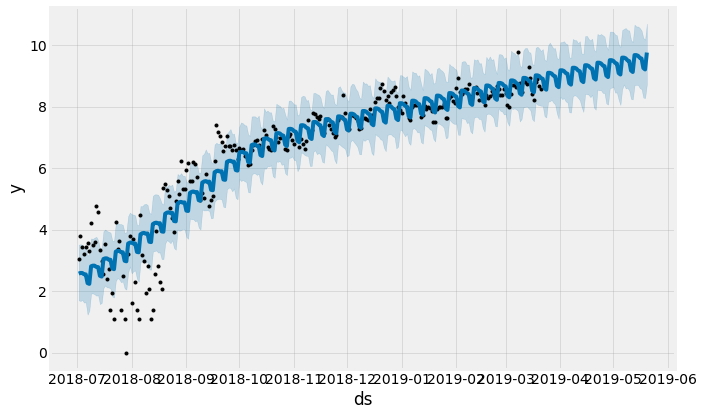

In [79]:
m1.plot(forecast1);

## Plotting the forecast components

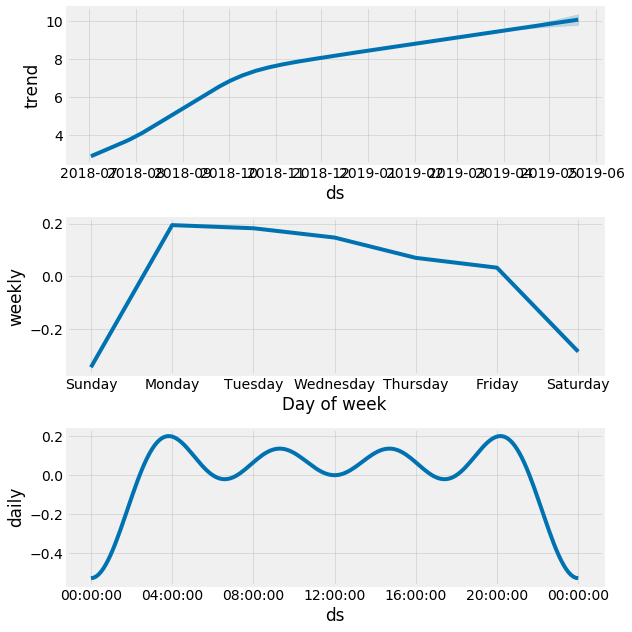

In [60]:
m1.plot_components(forecast1);

## Holiday Effect

In [80]:

articles = pd.DataFrame({
  'holiday': 'Article_Published',
  'ds': pd.to_datetime(['2018-07-02', '2018-07-06', '2018-07-08',
                        '2018-07-09', '2018-07-12', '2018-07-19', '2018-07-26', '2018-07-31',
                        '2018-08-06', '2018-08-15', '2018-07-19', '2018-08-26', '2018-08-31',
                        '2018-09-01', '2018-09-04', '2018-09-11', '2018-09-17', '2018-09-23',
                        '2018-10-02', '2018-10-09', '2018-10-18', '2018-10-19', '2018-10-26',
                        '2018-11-02', '2018-11-08', '2018-11-24', '2018-12-05', '2018-12-13',
                        '2018-12-19', '2018-12-24', '2018-12-27', '2019-01-08', '2019-01-11',
                        '2019-01-22', '2019-01-24', '2019-01-28', '2019-02-01', '2019-02-04',
                        '2019-02-07', '2019-02-12', '2019-02-15', '2019-02-21', '2019-03-03',
                        '2019-03-07', '2019-03-12', '2019-03-18', '2019-03-23' ]),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,Article_Published,2018-07-02,0,5
1,Article_Published,2018-07-06,0,5
2,Article_Published,2018-07-08,0,5
3,Article_Published,2018-07-09,0,5
4,Article_Published,2018-07-12,0,5


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



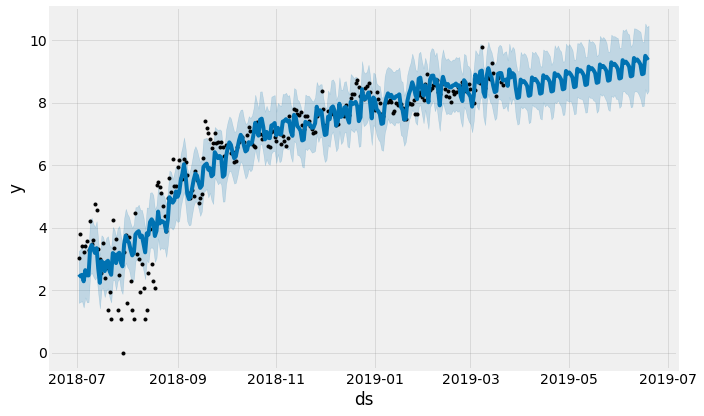

In [81]:
m2 = Prophet(holidays=articles,daily_seasonality=True).fit(df)
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

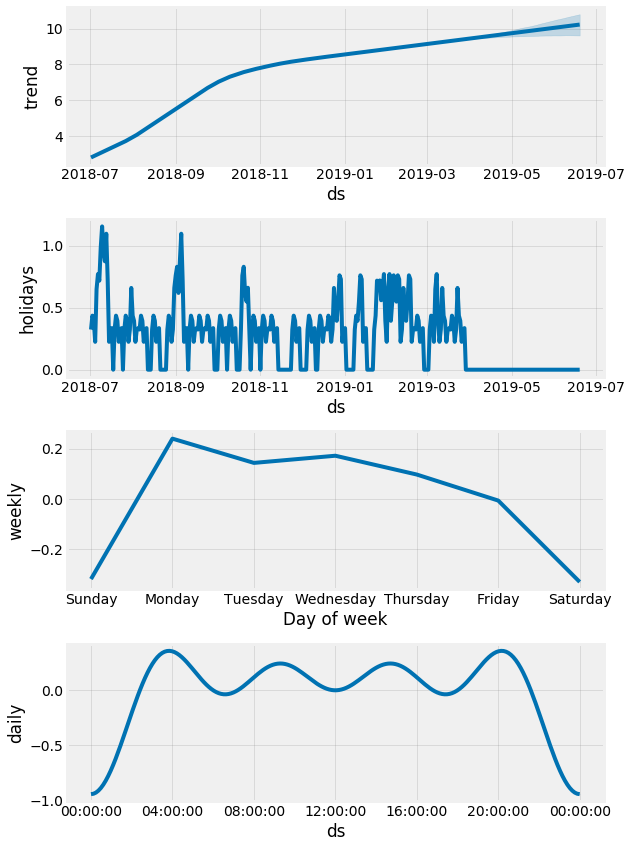

In [82]:
m2.plot_components(forecast2);

## Predicting Views for the next 15 days

In [83]:
m3 = Prophet(holidays=articles, mcmc_samples=300).fit(df)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = np.exp(forecast3.yhat).round()
forecast3["Views_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Views_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,Views_lower,Views,Views_upper
264,2019-03-23,2297.0,5794.0,15208.0
265,2019-03-24,1993.0,4750.0,12120.0
266,2019-03-25,3147.0,8003.0,19400.0
267,2019-03-26,2345.0,6147.0,15017.0
268,2019-03-27,2952.0,7123.0,17087.0
269,2019-03-28,2541.0,6740.0,16210.0
270,2019-03-29,1689.0,4327.0,9984.0
271,2019-03-30,1216.0,3141.0,7325.0
272,2019-03-31,1214.0,3222.0,7819.0
273,2019-04-01,2246.0,5691.0,13358.0


## Exporting the results to Excel

In [49]:
forecast3.to_excel('Predicted_Views.xlsx')